<a href="https://colab.research.google.com/github/Dinhthixuanbinh/Note/blob/main/4_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Data

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import os, shutil, pathlib
import random
import cv2
from sklearn.model_selection import train_test_split


In [ ]:
data = []
labels = []


target_size = (180,180)

In [ ]:
train_dir = '/content/drive/MyDrive/Dataset'

In [ ]:
def read_file(path,datas,labels):
    for category in os.listdir(path):
     category_dir = os.path.join(path, category)
     for image_name in os.listdir(category_dir):
        image_path = os.path.join(category_dir, image_name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, target_size)
        datas.append(image)
        labels.append(category)
    return np.array(datas), np.array(labels)

In [ ]:
read_file(train_dir,data,labels)

(array([[[[145, 135, 128],
          [144, 134, 127],
          [146, 136, 130],
          ...,
          [155, 147, 134],
          [164, 156, 143],
          [167, 159, 146]],
 
         [[148, 138, 131],
          [138, 128, 121],
          [143, 133, 126],
          ...,
          [156, 148, 136],
          [159, 151, 138],
          [163, 155, 142]],
 
         [[141, 131, 124],
          [133, 123, 116],
          [143, 133, 126],
          ...,
          [162, 154, 141],
          [164, 156, 143],
          [169, 161, 148]],
 
         ...,
 
         [[ 74,  78,  77],
          [ 61,  67,  66],
          [ 59,  65,  64],
          ...,
          [ 95, 107, 113],
          [ 89, 101, 107],
          [ 80,  90,  97]],
 
         [[ 99, 104, 100],
          [ 46,  52,  48],
          [ 52,  58,  54],
          ...,
          [ 84,  96, 102],
          [ 94, 106, 112],
          [ 77,  88,  95]],
 
         [[128, 134, 124],
          [113, 119, 109],
          [121, 126, 117],
   

In [ ]:
len(data), len(labels)

(11501, 11501)

In [ ]:
data = np.array(data)
labels = np.array(labels)

In [ ]:
data.shape

(11501, 180, 180, 3)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=100)

In [ ]:
x_train.shape


(9200, 180, 180, 3)

In [ ]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='softmax'))


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Encode the string labels to numerical values
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:


# Train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_encoded, epochs=5)

# Evaluate the model
score = model.evaluate(x_test, y_test_encoded)
print('Test accuracy:', score[1])


Epoch 1/5
288/288 [==============================] - 19s 53ms/step - loss: 21.5847 - accuracy: 0.4274
Epoch 2/5
288/288 [==============================] - 15s 52ms/step - loss: 1.1761 - accuracy: 0.4941
Epoch 3/5
288/288 [==============================] - 15s 53ms/step - loss: 0.8805 - accuracy: 0.6353
Epoch 4/5
288/288 [==============================] - 15s 53ms/step - loss: 0.6374 - accuracy: 0.7486
Epoch 5/5
72/72 [==============================] - 1s 16ms/step - loss: 2.7342 - accuracy: 0.4663
Test accuracy: 0.4663189947605133


In [ ]:
model.save('model.h5')

In [ ]:
model = tf.keras.models.load_model('/content/model.h5')

In [ ]:
y_test_encoded.shape

(2301,)

In [ ]:
predictions = model.predict(x_test)


72/72 [==============================] - 8s 18ms/step


In [ ]:
x_test.shape

(2301, 180, 180, 3)

In [ ]:
from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
combined_vectors = np.concatenate(x_test, axis=0)

combined_vectors.shape

(414180, 180, 3)

In [ ]:
combined_vectors_2d = np.reshape(combined_vectors, (414180, 540))
combined_vectors_2d.shape

(414180, 540)

In [ ]:

pca = PCA(2)
pca_x = pca.fit_transform(combined_vectors_2d)
pca_x.shape

(414180, 2)

In [ ]:
num_samples = min(pca_x.shape[0], y_test_encoded.shape[0])
num_samples

2301

In [ ]:
pca_vector = combined_vectors_2d[:num_samples]
# y_test_encoded = y_test_encoded[:num_samples]
pca_vector.shape

(2301, 540)

In [ ]:
pca = PCA(2)
pca_x = pca.fit_transform(pca_vector)
pca_x.shape

(2301, 2)

In [ ]:
pca_x.shape

(2301, 2)

In [ ]:
y_test_encoded.shape

(2301,)

In [ ]:
import tensorflow as tf

inputs = tf.keras.layers.Input((2,))
c = tf.Variable(tf.zeros((5,)))  # Example variable
c = tf.keras.layers.Dense(5, activation='relu')(inputs)
c = tf.keras.layers.Dense(6, activation='relu')(c)
c = tf.keras.layers.Dense(4, activation='relu')(c)
outputs = tf.keras.layers.Dense(4, activation='softmax')(c)
model = tf.keras.Model(inputs, outputs)

model.summary()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_24 (Dense)            (None, 5)                 15        
                                                                 
 dense_25 (Dense)            (None, 6)                 36        
                                                                 
 dense_26 (Dense)            (None, 4)                 28        
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
Total params: 99
Trainable params: 99
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
epochs=1
history = model.fit(
  pca_x,y_test_encoded,
  epochs=epochs
)
# model.fit(tf.expand_dims(pca_vector,axis=1),y_test_encoded,epochs=)

72/72 [==============================] - 2s 4ms/step - loss: 30.3953 - accuracy: 0.3598


In [ ]:
class ModelWrapper():
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        pred = self.model.predict(X)
        labels = np.argmax(pred, axis=-1)

        return labels

model_1 = ModelWrapper(model)

In [ ]:
!pip install mlxtend --upgrade --no-deps


In [ ]:
pca_vector_flattened = np.reshape(pca_x, (pca_x.shape[0], -1))


In [ ]:
pca_x

array([[  20.63630334,   75.41327317],
       [ -58.17150088,  264.06052388],
       [-127.29992889,  444.11832852],
       ...,
       [ 213.10566351, -238.22561872],
       [ 245.15441807, -312.05024509],
       [ 284.66624598, -251.6138101 ]])

In [ ]:
y_test_encoded

array([3, 2, 3, ..., 2, 3, 1])

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(pca_x,y_test_encoded, clf=model_1)

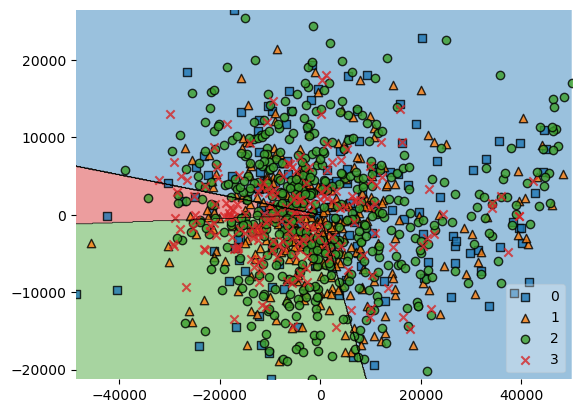